# Machine Learning Linear Regression

In [1]:
import pandas as pd
from pathlib import Path
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

In [2]:
profanity_df = pd.read_csv(Path('data/profanity.csv')) 
print(profanity_df.shape)
profanity_df.head()

(588, 5)


,title,artist,total_words,total_bad_words,perc_bad_words
0,"Hey, Soul Sister",Train,294,0,0.000000
1,Love The Way You Lie,Eminem,732,6,0.819672
2,TiK ToK,Kesha,465,1,0.215054
3,Bad Romance,Lady Gaga,521,6,1.151631
4,Just the Way You Are,Bruno Mars,324,1,0.308642


In [3]:
# This is years right now, but needs to be changed to popularity table 
popularity_df = pd.read_csv(Path('data/popularity.csv')) 
print(popularity_df.shape)
popularity_df.head()

(603, 5)


,title,artist,year,top genre,pop
0,"Hey, Soul Sister",Train,2010,neo mellow,83
1,Love The Way You Lie,Eminem,2010,detroit hip hop,82
2,TiK ToK,Kesha,2010,dance pop,80
3,Bad Romance,Lady Gaga,2010,dance pop,79
4,Just the Way You Are,Bruno Mars,2010,pop,78


In [5]:
joined_df = pd.merge(profanity_df, popularity_df, how='inner', left_on = 'title', right_on = 'title')

joined_df.dropna

print(joined_df.shape)
joined_df.head(10)

(612, 9)


,title,artist_x,total_words,total_bad_words,perc_bad_words,artist_y,year,top genre,pop
0,"Hey, Soul Sister",Train,294,0,0.000000,Train,2010,neo mellow,83
1,Love The Way You Lie,Eminem,732,6,0.819672,Eminem,2010,detroit hip hop,82
2,TiK ToK,Kesha,465,1,0.215054,Kesha,2010,dance pop,80
3,Bad Romance,Lady Gaga,521,6,1.151631,Lady Gaga,2010,dance pop,79
4,Just the Way You Are,Bruno Mars,324,1,0.308642,Bruno Mars,2010,pop,78
5,Just the Way You Are,Bruno Mars,324,1,0.308642,Bruno Mars,2011,pop,78
6,Just the Way You Are,Bruno Mars,324,1,0.308642,Bruno Mars,2010,pop,78
7,Just the Way You Are,Bruno Mars,324,1,0.308642,Bruno Mars,2011,pop,78
8,Baby,Justin Bieber,442,0,0.000000,Justin Bieber,2010,canadian pop,77
9,Dynamite,Taio Cruz,371,1,0.269542,Taio Cruz,2010,dance pop,77


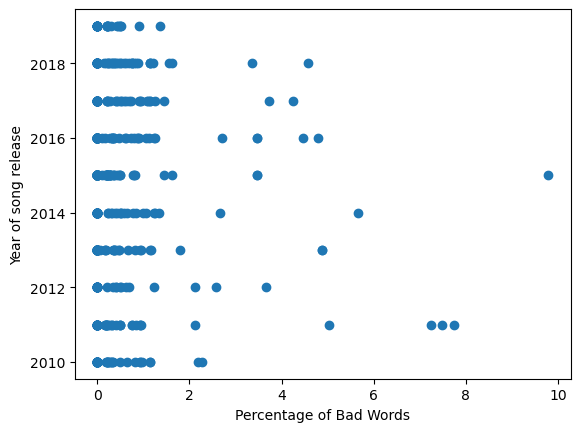

In [13]:
plt.scatter(joined_df.perc_bad_words, joined_df.year)
plt.xlabel('Percentage of Bad Words')
plt.ylabel('Year of song release')
plt.show()

In [6]:
X = joined_df.perc_bad_words.values.reshape(-1, 1)

# X = profanity_df.YearsExperience.values.reshape(-1, 1)
print(X)

[[0.        ]
 [0.81967213]
 [0.21505376]
 [1.15163148]
 [0.30864198]
 [0.30864198]
 [0.30864198]
 [0.30864198]
 [0.        ]
 [0.26954178]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.4950495 ]
 [0.        ]
 [0.        ]
 [0.34883721]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.23041475]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.2283105 ]
 [0.        ]
 [0.        ]
 [0.1980198 ]
 [0.1980198 ]
 [1.13493064]
 [1.13493064]
 [0.        ]
 [0.95923261]
 [0.        ]
 [0.        ]
 [0.        ]
 [2.28136882]
 [0.        ]
 [0.        ]
 [0.        ]
 [2.19123506]
 [0.        ]
 [0.        ]
 [0.27662517]
 [0.        ]
 [0.        ]
 [0.6514658 ]
 [0.21881838]
 [0.21881838]
 [0.21881838]
 [0.21881838]
 [0.        ]
 [0.93167702]
 [0.93167702]
 [0.93167702]
 [0.93167702]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.48622366]
 [0.18181818]
 [0.17

In [7]:
y = joined_df.year
print(y)

0      2010
1      2010
2      2010
3      2010
4      2010
       ... 
607    2019
608    2019
609    2019
610    2019
611    2019
Name: year, Length: 612, dtype: int64


In [8]:
# Create a model with scikit-learn
model = LinearRegression()

In [9]:
# Fit the data into the model
# By convention, X is capitalized and y is lowercase
model.fit(X, y)

LinearRegression()

In [10]:
y_pred = model.predict(X)
print(y_pred.shape)

(612,)


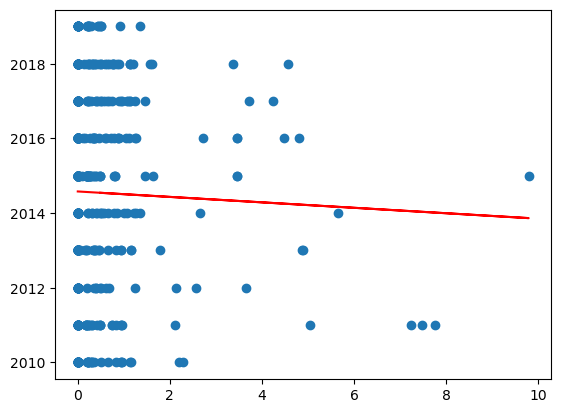

In [14]:
plt.scatter(X, y)
plt.plot(X, y_pred, color='red')
plt.show()

In [11]:
print(model.coef_)
print(model.intercept_)

[-0.07292869]
2014.58086992542
